In [1]:
from common import NWSL, Fonts, Images
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numpy as np
from scipy.interpolate import interp1d
from scipy import stats

In [2]:
df = pd.read_csv("data.csv", index_col=0)
df

,4/27,5/1,5/8,5/15,5/23,5/30,6/7,6/12,6/19,7/3,...,8/2,8/7,8/14,8/20,8/28,9/4,9/11,9/18,9/25,10/2
NJNY,0.55,0.68,0.50,0.52,0.38,0.50,0.61,0.51,0.33,0.22,...,0.11,0.06,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0
POR,0.70,0.79,0.79,0.77,0.61,0.63,0.73,0.88,0.94,0.94,...,0.99,0.99,0.99,0.99,0.97,0.97,0.99,0.99,1.00,1
LA,0.17,0.26,0.17,0.29,0.37,0.27,0.17,0.29,0.24,0.27,...,0.33,0.26,0.41,0.41,0.46,0.45,0.41,0.15,0.07,0
CHI,0.66,0.72,0.72,0.63,0.74,0.72,0.82,0.86,0.85,0.94,...,0.81,0.87,0.77,0.60,0.69,0.67,0.67,0.66,0.28,1
WAS,0.80,0.85,0.84,0.74,0.75,0.72,0.59,0.47,0.37,0.28,...,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0
SD,0.28,0.37,0.57,0.69,0.75,0.71,0.71,0.72,0.88,0.95,...,0.96,0.92,0.80,0.90,0.97,0.97,0.92,0.99,1.00,1
NC,0.71,0.61,0.66,0.66,0.38,0.37,0.51,0.67,0.53,0.44,...,0.39,0.40,0.21,0.33,0.24,0.31,0.41,0.24,0.66,0
RGN,0.81,0.75,0.69,0.70,0.66,0.79,0.71,0.71,0.78,0.89,...,0.90,0.80,0.88,0.85,0.88,0.87,0.82,0.99,1.00,1
LOU,0.34,0.28,0.31,0.28,0.49,0.40,0.26,0.15,0.17,0.14,...,0.03,0.01,0.01,0.01,0.04,0.00,0.00,0.00,0.00,0
HOU,0.37,0.27,0.39,0.39,0.57,0.56,0.69,0.53,0.74,0.63,...,0.86,0.95,0.93,0.93,0.85,0.83,0.80,0.99,0.99,1


In [3]:
# Current standings with the top team first
standings = [
    "RGN",
    "POR",
    "SD",
    "HOU",
    "KC",
    "CHI",
    "NC",
    "LA",
    "LOU",
    "ORL",
    "WAS",
    "NJNY",
]

# List of teams who clinched
clinched = ["POR", "RGN", "KC", "SD", "HOU", "CHI"]

# List of teams eliminated
eliminated = []

In [4]:
# Sort first by odds and then use standings to break ties
sort_by = [df.columns[-1], "standing"]
df["standing"] = list(map(lambda x: len(df.index) - standings.index(x), df.index))
df = df.sort_values(by="standing")
df = df.drop(columns=["standing"])
df

,4/27,5/1,5/8,5/15,5/23,5/30,6/7,6/12,6/19,7/3,...,8/2,8/7,8/14,8/20,8/28,9/4,9/11,9/18,9/25,10/2
NJNY,0.55,0.68,0.50,0.52,0.38,0.50,0.61,0.51,0.33,0.22,...,0.11,0.06,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0
WAS,0.80,0.85,0.84,0.74,0.75,0.72,0.59,0.47,0.37,0.28,...,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0
ORL,0.25,0.15,0.21,0.18,0.21,0.23,0.12,0.08,0.04,0.05,...,0.06,0.03,0.09,0.14,0.00,0.03,0.00,0.01,0.00,0
LOU,0.34,0.28,0.31,0.28,0.49,0.40,0.26,0.15,0.17,0.14,...,0.03,0.01,0.01,0.01,0.04,0.00,0.00,0.00,0.00,0
LA,0.17,0.26,0.17,0.29,0.37,0.27,0.17,0.29,0.24,0.27,...,0.33,0.26,0.41,0.41,0.46,0.45,0.41,0.15,0.07,0
NC,0.71,0.61,0.66,0.66,0.38,0.37,0.51,0.67,0.53,0.44,...,0.39,0.40,0.21,0.33,0.24,0.31,0.41,0.24,0.66,0
CHI,0.66,0.72,0.72,0.63,0.74,0.72,0.82,0.86,0.85,0.94,...,0.81,0.87,0.77,0.60,0.69,0.67,0.67,0.66,0.28,1
KC,0.36,0.27,0.15,0.15,0.09,0.10,0.08,0.13,0.13,0.25,...,0.51,0.68,0.87,0.82,0.90,0.90,0.98,0.98,1.00,1
HOU,0.37,0.27,0.39,0.39,0.57,0.56,0.69,0.53,0.74,0.63,...,0.86,0.95,0.93,0.93,0.85,0.83,0.80,0.99,0.99,1
SD,0.28,0.37,0.57,0.69,0.75,0.71,0.71,0.72,0.88,0.95,...,0.96,0.92,0.80,0.90,0.97,0.97,0.92,0.99,1.00,1


In [5]:
x = list(range(0, len(df.columns)))
y = df.to_numpy()

In [6]:
# Create grid for x and bottom values for y
x2 = np.linspace(min(x), max(x), num=200)
y2 = [[0 for i in x2]]

# Sum the previous rows before calculating the spline
run_tot = [0 for i in x]

# Interpolate each set of points
for row in y[:-1]:
    run_tot = run_tot + row
    f = interp1d(x, run_tot, kind="quadratic")
    y2.append(f(x2))

# Last row has to be exactly 6
y2.append([6 for i in x2])

# Diff pairwise rows to get the final y
y2 = np.diff(y2, axis=0)

<Figure size 432x288 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

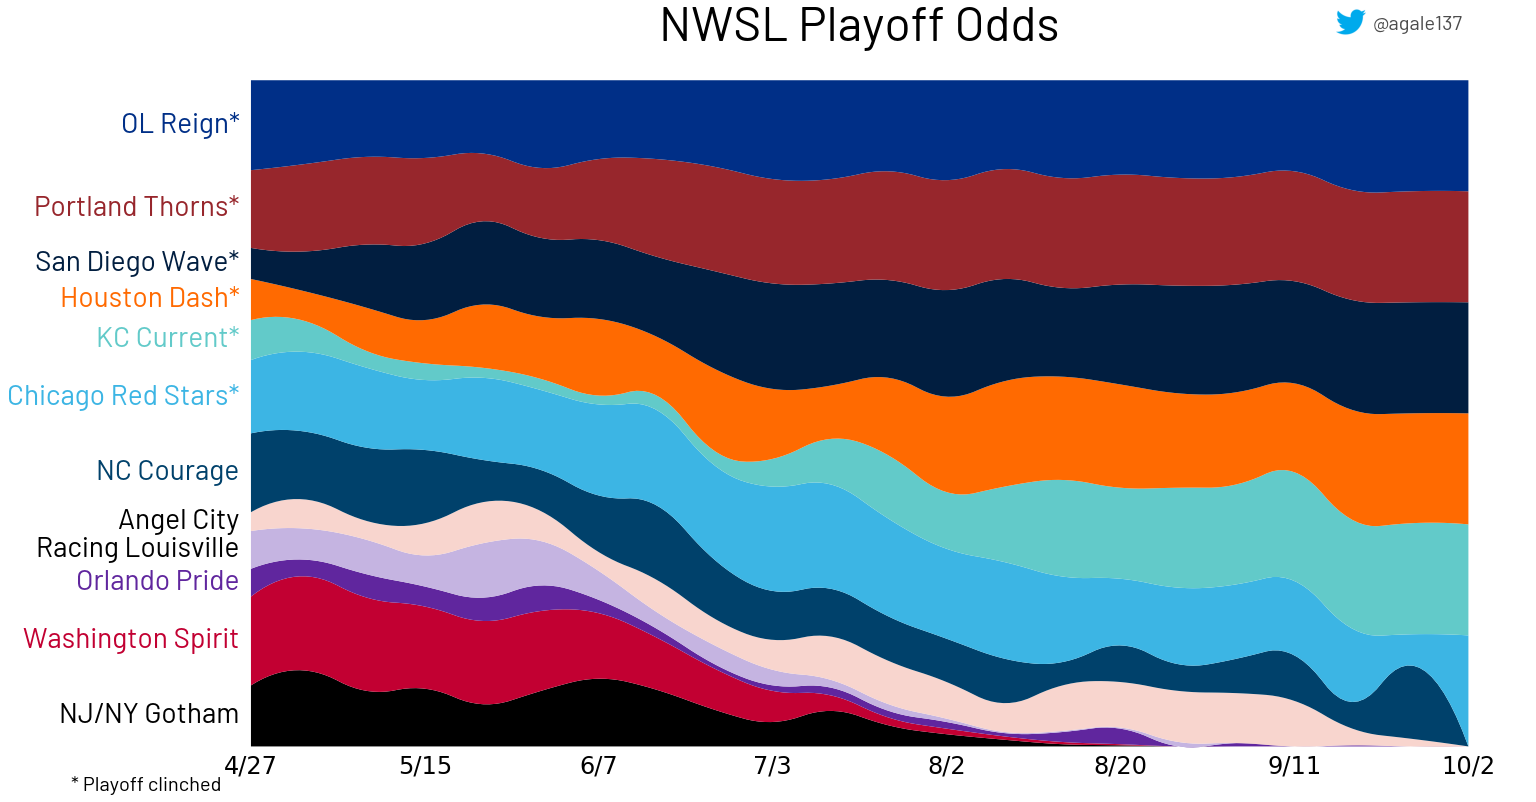

In [7]:
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Plot data
plt.stackplot(
    x2,
    y2,
    labels=df.index,
    colors=[NWSL.COLORS[i] for i in df.index],
    baseline="zero",
)

# Plot team labels
pos = 0
for team in df.index:
    pos += df.at[team, str(df.columns[0])]
    ax.text(
        0,
        pos - 0.5 * df.at[team, str(df.columns[0])],
        NWSL.NAMES[team] + ("*" if team in clinched else "") + "  ",
        color="black" if team in ["LA", "LOU"] else NWSL.COLORS[team],
        alpha=0.4 if team in eliminated else 1,
        fontsize=28,
        fontproperties=Fonts.BARLOW,
        fontweight="bold",
        va="center",
        ha="right",
    )

# Add the clinched label
if len(clinched) > 0:
    ax.text(
        -0.5,
        -0.35,
        "* Playoff clinched",
        color="black",
        fontsize=20,
        fontproperties=Fonts.BARLOW,
        fontweight="bold",
        va="center",
        ha="right",
    )

# Title
plt.title("NWSL Playoff Odds", fontproperties=Fonts.BARLOW, size=48)

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])

# X ticks
def format_fn(tick_val, tick_pos):
    if int(tick_val) >= 0 and int(tick_val) < len(df.columns):
        return df.columns[int(tick_val)]
    else:
        return ""

ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis="x", which="major", labelsize=24, pad=-30)

# Twitter logo and username
plt.text(
    0.95,
    1.03,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=20,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.775,0.89,0.03,0.03], anchor='SE', zorder=1)
newax.imshow(Images.TWITTER)
newax.axis('off')

# Save image
plt.savefig(df.columns[-1 ].replace('/', '-') + ".png", bbox_inches="tight", pad_inches=0.5)

<IPython.core.display.Javascript object>


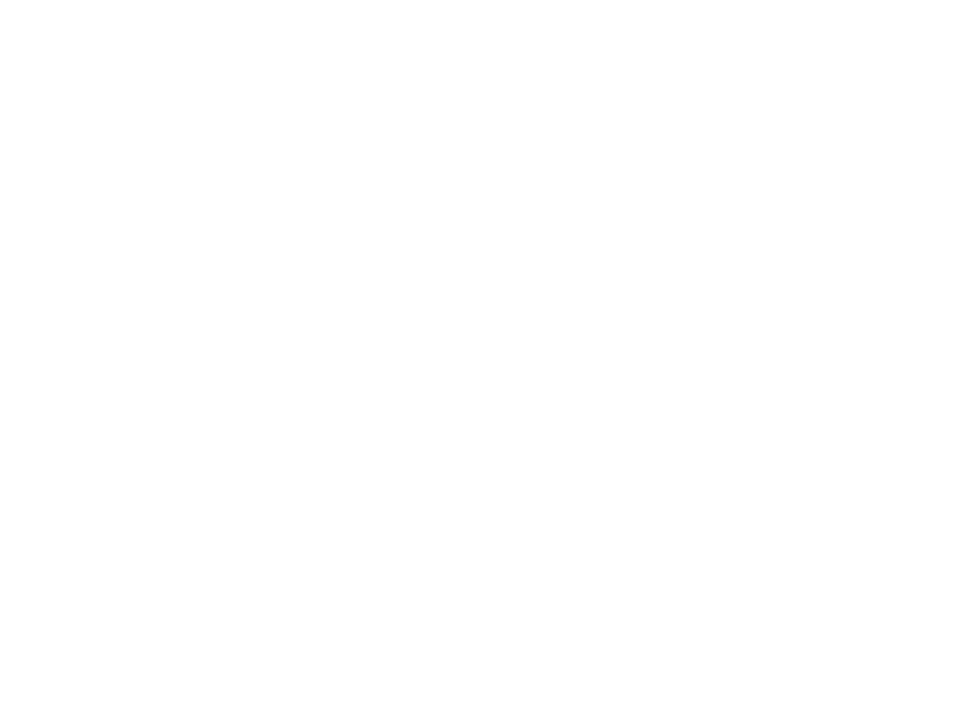

<IPython.core.display.Javascript object>


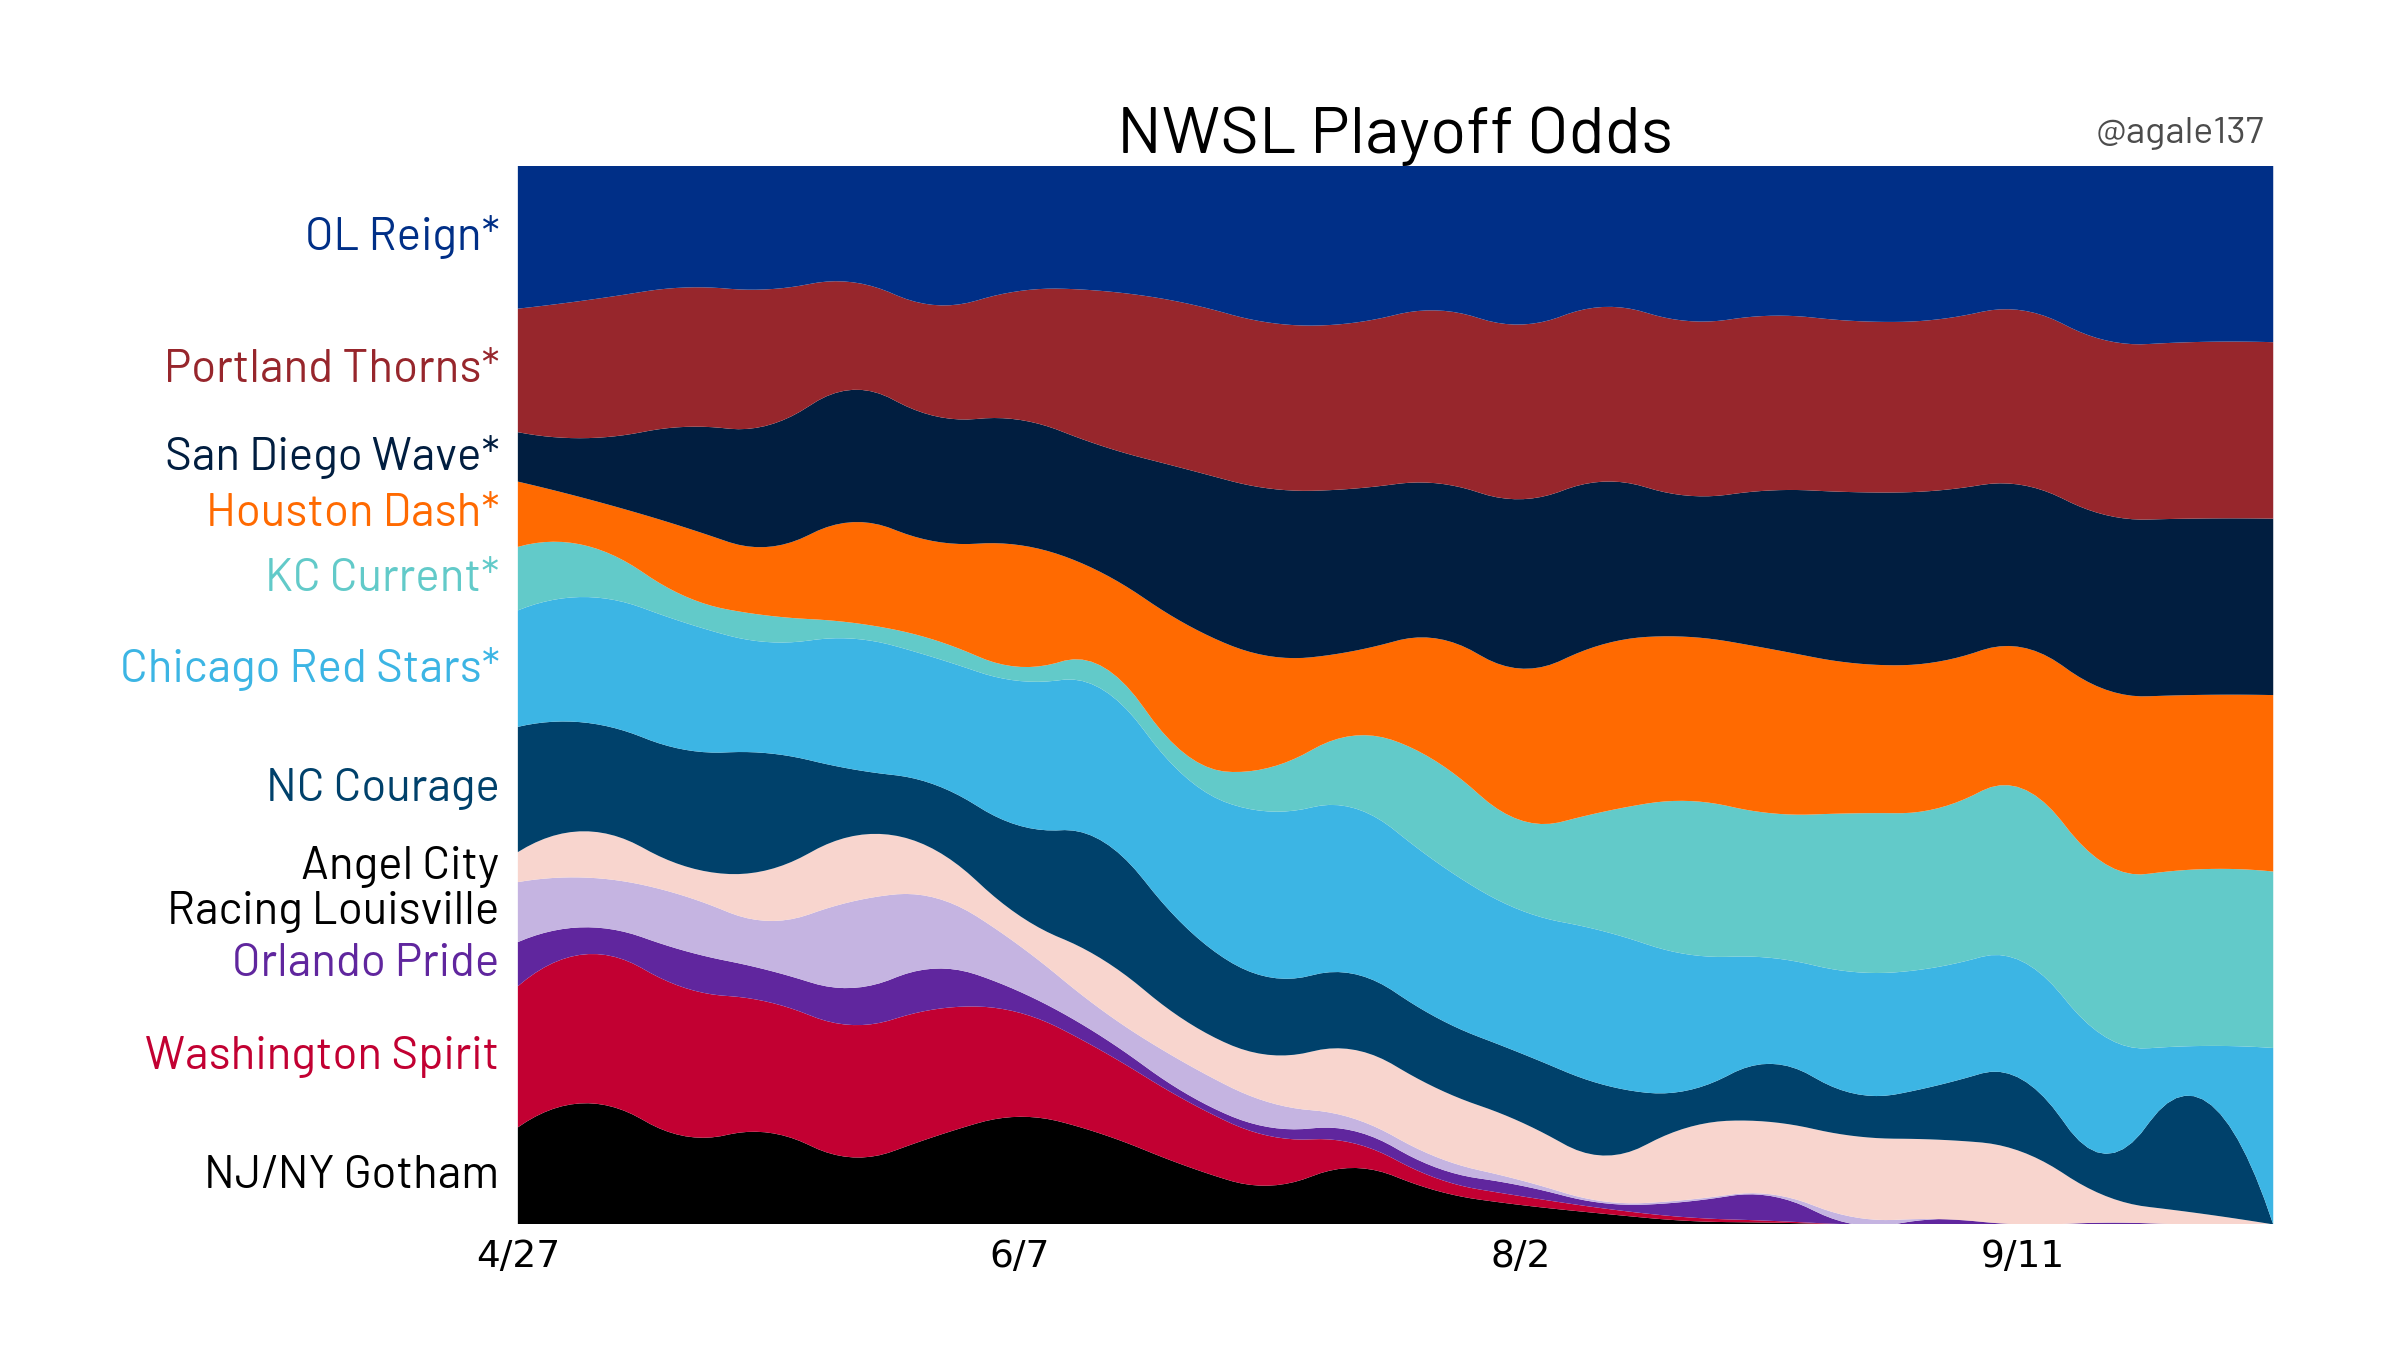

In [8]:
%matplotlib notebook

plt.clf()
fig, ax = plt.subplots(figsize=(16, 9))
fig.tight_layout(rect=[0.15, 0.05, 1, 0.90])
fig.patch.set_facecolor("white")

step = 10

def animate(i):
    if i * step > len(x2):
        return

    ax.cla()  # clear the previous image

    ax.set_ylim([0, 6])  # fix the y axis

    # Plot team labels
    pos = 0
    for team in df.index:
        pos += df.at[team, str(df.columns[0])]
        ax.text(
            0,
            pos - 0.5 * df.at[team, str(df.columns[0])],
            NWSL.NAMES[team] + ("*" if team in clinched else "") + "  ",
            color="black" if team in ["LA", "LOU"] else NWSL.COLORS[team],
            alpha=0.4 if team in eliminated else 1,
            fontsize=22,
            fontproperties=Fonts.BARLOW,
            fontweight="bold",
            va="center",
            ha="right",
        )

    # Title
    plt.title("NWSL Playoff Odds", fontproperties=Fonts.BARLOW, size=32)

    # General
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_yticks([])

    # X ticks
    def format_fn(tick_val, tick_pos):
        if int(tick_val) >= 0 and int(tick_val) < len(df.columns):
            return df.columns[int(tick_val)]
        else:
            return ""

    ax.xaxis.set_major_formatter(format_fn)
    ax.set_xticks([0, 6, 12, 18])
    ax.tick_params(axis="x", which="major", labelsize=18)

    # Username
    plt.text(
        0.95,
        1.03,
        "@agale137",
        transform=ax.transAxes,
        color="black",
        fontsize=18,
        alpha=0.7,
        fontproperties=Fonts.BARLOW,
        va="center",
        ha="right",
    )

    # Plot data
    plt.stackplot(
        x2[: i * step + 1],
        [j[: i * step + 1] for j in y2],
        labels=df.index,
        colors=[NWSL.COLORS[i] for i in df.index],
        baseline="zero",
    )


anim = animation.FuncAnimation(
    fig, animate, frames=int(len(x2) / step) * 3, interval=1, blit=False
)

anim.save(df.columns[-1 ].replace('/', '-') + ".gif", writer=PillowWriter(fps=12))